# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Creating some data to view and fit

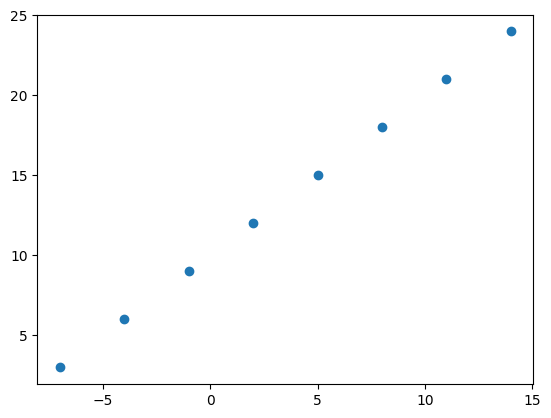

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
# Relationship that have to learn our neural network
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performances of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.5207 - mae: 10.5207
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 10.3882 - mae: 10.3882
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 10.2557 - mae: 10.2557
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 10.1232 - mae: 10.1232
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 9.9907 - mae: 9.9907


In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 71ms/step


array([[17.495777]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [12]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 188ms/step - loss: 10.8267 - mae: 10.8267
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6942 - mae: 10.6942
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5617 - mae: 10.5617
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4292 - mae: 10.4292
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2967 - mae: 10.2967
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1642 - mae: 10.1642
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0317 - mae: 10.0317
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8992 - mae: 9.8992
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7667 - mae: 9.7667
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6342 - mae: 9.6342
Epoch 11/100
1/1 [==============================] - 0s 3ms/step

In [13]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Let's see if our model prediction has improved...
model.predict([17])

1/1 [==============================] - 0s 46ms/step


array([[29.86688]], dtype=float32)

In [15]:
# Let's see if we can make another to improve our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 247ms/step - loss: 13.5792 - mae: 13.5792
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9810 - mae: 12.9810
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3803 - mae: 12.3803
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7754 - mae: 11.7754
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1644 - mae: 11.1644
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5439 - mae: 10.5439
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9106 - mae: 9.9106
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2594 - mae: 9.2594
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5866 - mae: 8.5866
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8889 - mae: 7.8889
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [16]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 51ms/step


array([[25.987635]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```

Build a model -> fit it -> evaluate it -> tweak a model -> repeat it

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model looke like?
* The training of the model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [18]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

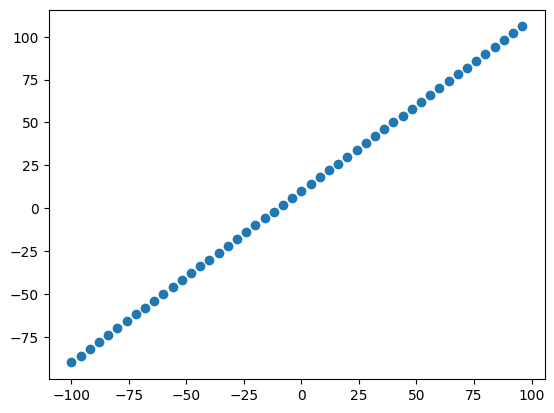

In [19]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available.

In [20]:
# Check the length of how many samples we have
len(X)

50

In [21]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and test sets... let's visualize it again!

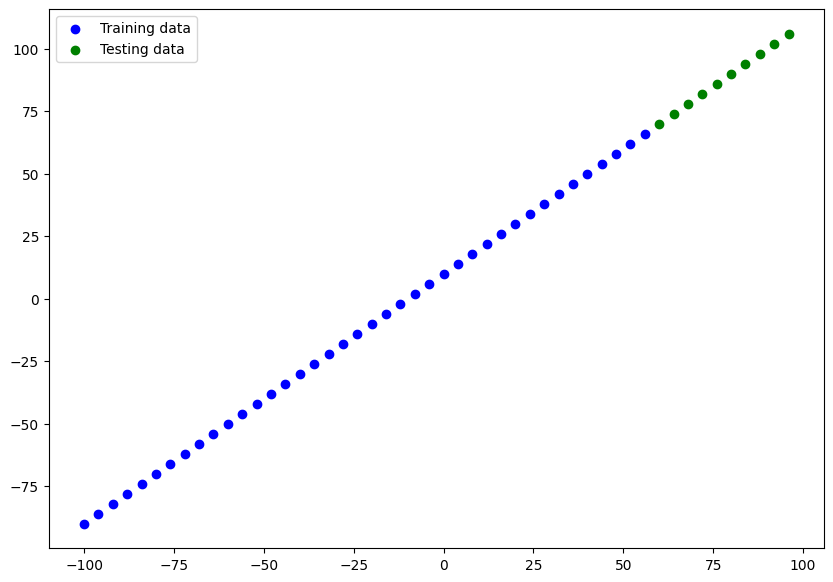

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test set in green
plt.scatter(X_test, y_test, c="green", label="Testing data")
# Show a legend
plt.legend()
plt.show()

In [23]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [24]:
# model.summary() --> This will raise an error because of there isn not input_shape

### Visualizing the model

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # input_shape represents the number of variables/columns
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typically when you bring parameters from other models during **transfer learning**)

In [27]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

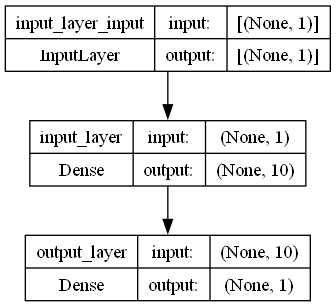

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [29]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[ 69.520645],
       [ 74.04211 ],
       [ 78.56356 ],
       [ 83.08503 ],
       [ 87.60649 ],
       [ 92.12796 ],
       [ 96.64942 ],
       [101.17088 ],
       [105.69234 ],
       [110.2138  ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [31]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();


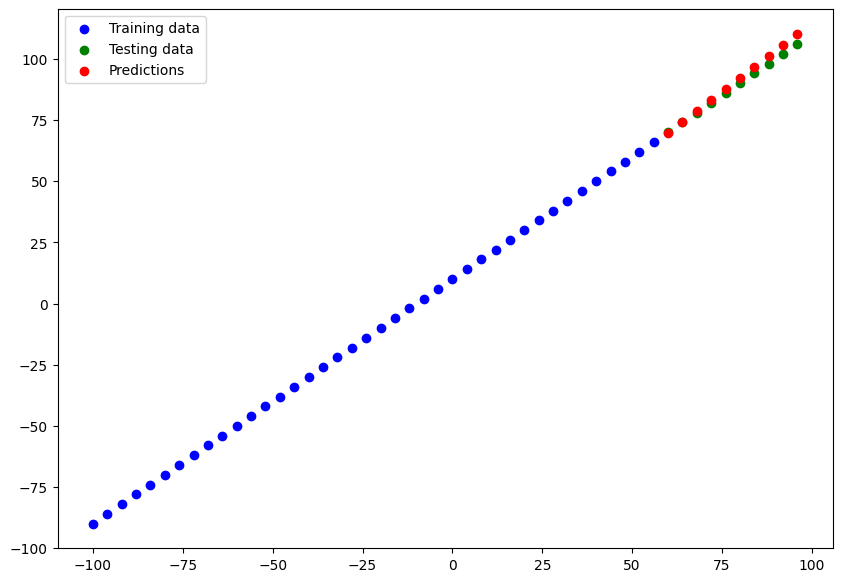

In [32]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error
* MSE - mean square error

In [33]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 1.9631 - mae: 1.9631


[1.9630943536758423, 1.9630943536758423]

In [34]:
y_pred

array([[ 69.520645],
       [ 74.04211 ],
       [ 78.56356 ],
       [ 83.08503 ],
       [ 87.60649 ],
       [ 92.12796 ],
       [ 96.64942 ],
       [101.17088 ],
       [105.69234 ],
       [110.2138  ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [36]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9630944>

In [37]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.729886>

In [38]:
# Make somre functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2120 - mae: 11.2120
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 8.9388 - mae: 8.9388
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6635 - mae: 12.6635
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7476 - mae: 8.7476
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.9607 - mae: 10.9607
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1274 - mae: 10.1274
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1526 - mae: 9.1526
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1102 - mae: 9.1102
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 15.1671 - mae: 15.1671
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 7.8263 - mae: 7.8263
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 31ms/step


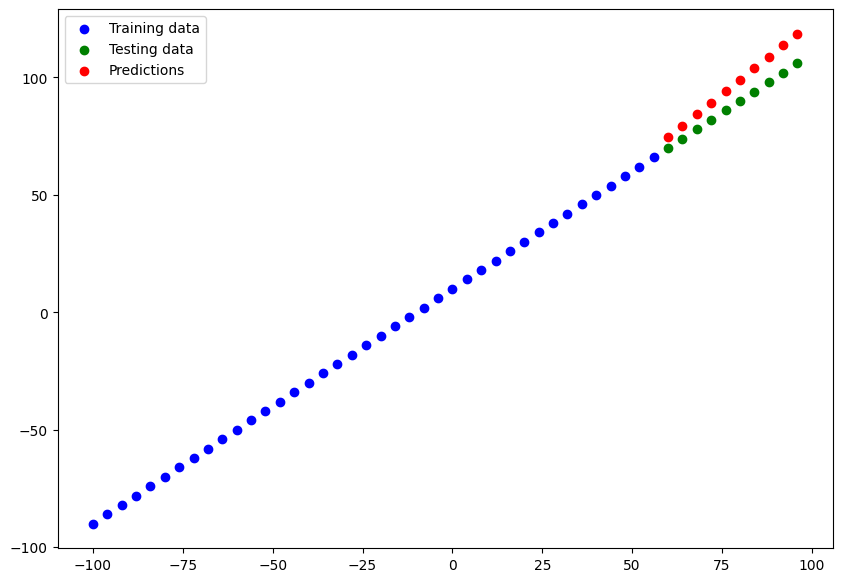

In [40]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [41]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.602164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.48811>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [42]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 46.6306 - mse: 3328.2156
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 26.5523 - mse: 907.7192
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 31.4412 - mse: 1490.0201
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 28.7586 - mse: 1227.4424
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.5958 - mse: 316.0969
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3535 - mse: 193.9797
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6214 - mse: 165.3852
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0128 - mse: 195.9153
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 37.4704 - mse: 2160.1917
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.1250 - mse: 885.3057
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 35ms/step


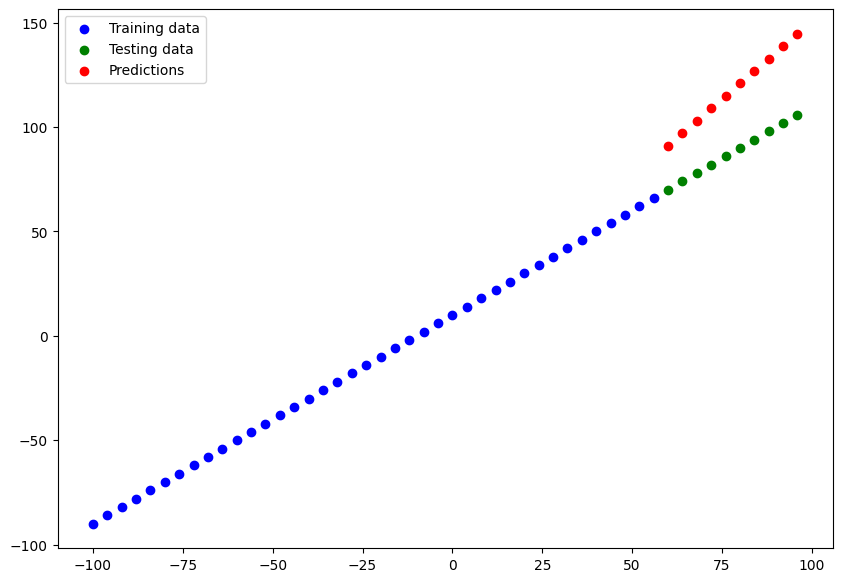

In [43]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [44]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.91055>,
 <tf.Tensor: shape=(), dtype=float32, numpy=926.06525>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [45]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 26.4637 - mae: 26.4637
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.4222 - mae: 24.4222
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.3143 - mae: 29.3143
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 15.9570 - mae: 15.9570
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 21.9854 - mae: 21.9854
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4512 - mae: 11.4512
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 12.5291 - mae: 12.5291
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0555 - mae: 11.0555
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 39.5986 - mae: 39.5986
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.1165 - mae: 27.1165
Epoch 11/500
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 37ms/step


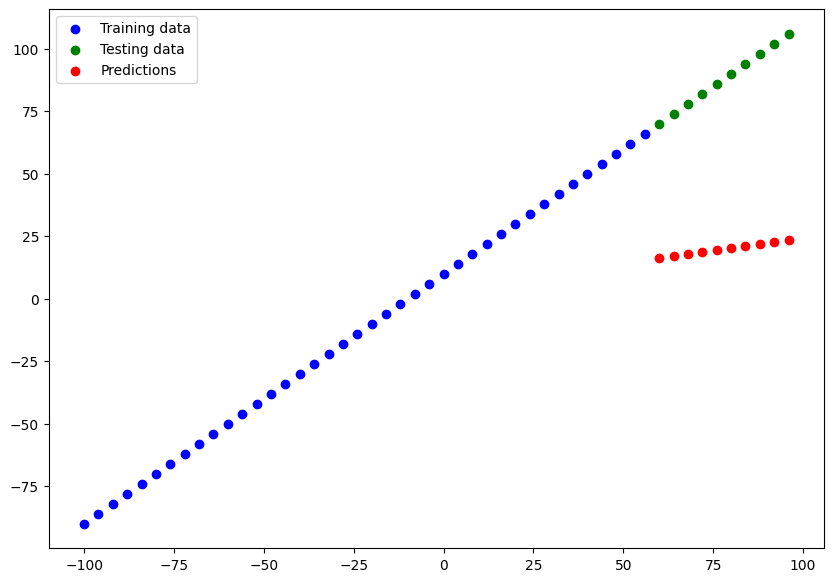

In [46]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [47]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94156>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4700.4766>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [48]:
# Let's compare out model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.602164,80.488113
1,model_2,29.910549,926.065247
2,model_3,67.941559,4700.476562


Looks like `model_1` performed the best...

In [49]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of local jupyter notebooks (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [50]:
# Save model
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [51]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("C:/Users/Usuario/Documents/ML_Projects/TensorFlow/Neural_Network_Regression/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [59]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("C:/Users/Usuario/Documents/ML_Projects/TensorFlow/Neural_Network_Regression/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_2_preds == loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [7]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test stes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
import numpy as np
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [10]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 3ms/step - loss: 8669.8535 - mae: 8669.8535
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.6748 - mae: 7884.6748
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7531.4849 - mae: 7531.4849
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7690.9688 - mae: 7690.9688
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7682.1714 - mae: 7682.1714
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.1724 - mae: 7593.1724
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7592.4438 - mae: 7592.4438
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7728.6069 - mae: 7728.6069
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7584.9771 - mae: 7584.9771
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2373 - mae: 7732.2373

In [11]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7291.4307 - mae: 7291.4307


[7291.4306640625, 7291.4306640625]

Right now it looks like our model isn't performing too well... let's try and improve it!

To try improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimize.
2. Same as above but train for longer.

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4827.8994 - mae: 4827.8994


[4827.8994140625, 4827.8994140625]

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [15]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3492.3518 - mae: 3492.3518


[3492.351806640625, 3492.351806640625]

> **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the ``EarlyStopping Callback``, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='Frequency'>

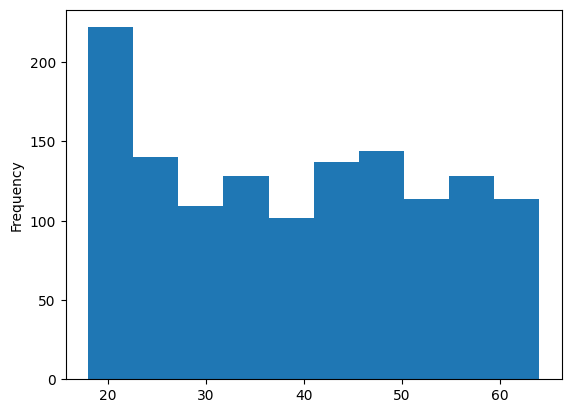

In [16]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

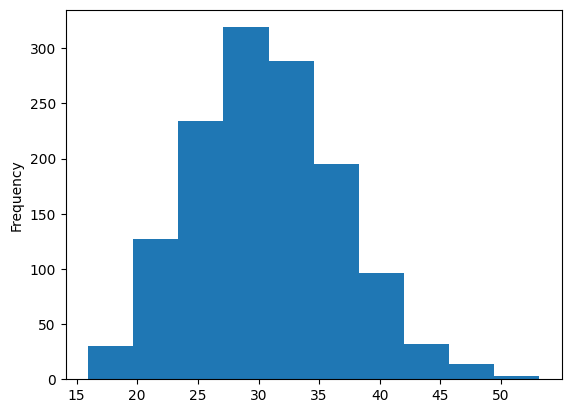

In [19]:
X["bmi"].plot(kind="hist")

In [18]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

To prepare our data, we can borrow a few classes from Scikit-learn.

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a colummn transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [28]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [29]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [30]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# 3. Fit the model
insurance_model_normal.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13344.5059 - mae: 13344.5059
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13337.9062 - mae: 13337.9062
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13320.5127 - mae: 13320.5127
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13282.8682 - mae: 13282.8682
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13214.3809 - mae: 13214.3809
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13103.7207 - mae: 13103.7207
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12940.0938 - mae: 12940.0938
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12713.1055 - mae: 12713.1055
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12412.3770 - mae: 12412.3770
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12030.97

In [31]:
# Evaluate our insurance model trained on normalized data
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.3823 - mae: 3440.3823


[3440.38232421875, 3440.38232421875]